In [12]:
%matplotlib inline
import bt

In [3]:
class MyAlgo(bt.Algo):
    def __init__(self, a1, a2):
        self.a1 = a1
        self.a2 = a2
    
    def __call__(self, target):
        # logic
        # accessing/storing variables
        return True

In [4]:
def MyAlgo2(target):
    # logic without accessing/storing variables
    return True

In [6]:
data = bt.get('spy,agg,eem', start='2010-01-01')

https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=1262304000&period2=1507282651&interval=1d&events=history&crumb=xUNAof62kEK
https://query1.finance.yahoo.com/v7/finance/download/AGG?period1=1262304000&period2=1507282652&interval=1d&events=history&crumb=xUNAof62kEK
https://query1.finance.yahoo.com/v7/finance/download/EEM?period1=1262304000&period2=1507282652&interval=1d&events=history&crumb=xUNAof62kEK


In [7]:
# create the momentum strategy - we will specify the children (3rd argument)
# to limit the universe the strategy can choose from
mom_s = bt.Strategy('mom_s', [bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.SelectMomentum(1),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                    ['spy', 'eem'])

# create the master strategy - this is the top-most node in the tree
# Once again, we are also specifying  the children. In this case, one of the
# children is a Security and the other is a Strategy.
master = bt.Strategy('master', [bt.algos.RunMonthly(),
                                bt.algos.SelectAll(),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                    [mom_s, 'agg'])

# create the backtest and run it
t = bt.Backtest(master, data)
r = bt.run(t)

master
0% [############################# ] 100% | ETA: 00:00:00

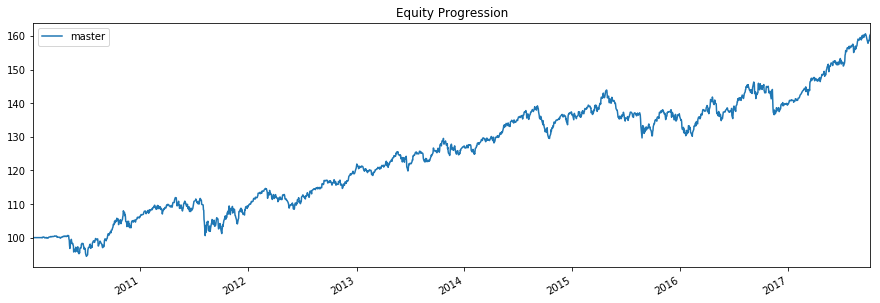

In [13]:
r.plot()